Nama : Ferry Agung Febianto<br>
Nim : 21.12.1850<br>

In [73]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"arisupriatna","key":"df8549413f85161439b81edfb8d266fd"}'}

In [74]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


###Mendowload dataset

In [75]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction

heart-failure-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


###Membuat folder dan Meng ektrak folder zip

In [76]:
!mkdir heart-failure-prediction
!unzip heart-failure-prediction.zip -d heart-failure-prediction
!ls heart-failure-prediction

mkdir: cannot create directory ‘heart-failure-prediction’: File exists
Archive:  heart-failure-prediction.zip
replace heart-failure-prediction/heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: heart.csv


###Library yang digunakan

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [78]:
df = pd.read_csv('heart-failure-prediction/heart.csv')

In [79]:
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
222,48,F,NAP,120,195,0,Normal,125,N,0.0,Up,0


In [80]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [81]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype == "float64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)


In [82]:
from sklearn.preprocessing import LabelEncoder

lesex = LabelEncoder()
lesex.fit(df['Sex'])
lesex.classes_
df['Sex'] = lesex.transform(df['Sex'])

lec = LabelEncoder()
lec.fit(df['ChestPainType'])
LabelEncoder()
lec.classes_
df['ChestPainType'] = lec.transform(df['ChestPainType'])

lex = LabelEncoder()
lex.fit(df['RestingECG'])
LabelEncoder()
lex.classes_
df['RestingECG'] = lex.transform(df['RestingECG'])

le = LabelEncoder()
le.fit(df['ExerciseAngina'])
LabelEncoder()
le.classes_
df['ExerciseAngina'] = le.transform(df['ExerciseAngina'])


lee = LabelEncoder()
lee.fit(df['ST_Slope'])
LabelEncoder()
lee.classes_
df['ST_Slope'] = lee.transform(df['ST_Slope'])





In [83]:
list(le.inverse_transform([0 , 1]))

['N', 'Y']

In [84]:
list(lee.inverse_transform([0 , 1, 2]))

['Down', 'Flat', 'Up']

In [85]:
df['ST_Slope']

0      2
1      1
2      2
3      1
4      2
      ..
913    1
914    1
915    1
916    1
917    2
Name: ST_Slope, Length: 918, dtype: int64

In [86]:
df['Sex']

0      1
1      0
2      1
3      0
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Name: Sex, Length: 918, dtype: int64

In [87]:
list(lesex.inverse_transform([0 , 1]))

['F', 'M']

In [88]:
list(lec.inverse_transform([0 , 1, 2, 3]))

['ASY', 'ATA', 'NAP', 'TA']

In [89]:
list(lex.inverse_transform([0 , 1, 2]))

['LVH', 'Normal', 'ST']

In [90]:
df['RestingECG']

0      1
1      1
2      2
3      1
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Name: RestingECG, Length: 918, dtype: int64

In [91]:
df['ChestPainType']

0      1
1      2
2      1
3      0
4      2
      ..
913    3
914    0
915    0
916    1
917    2
Name: ChestPainType, Length: 918, dtype: int64

In [92]:
catgcols

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


<h2>transformasi datase
#clean

<Axes: >

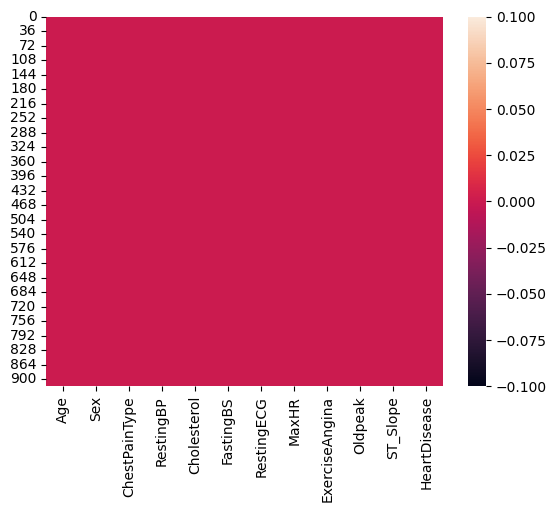

In [96]:
sns.heatmap(df.isnull())

<Axes: >

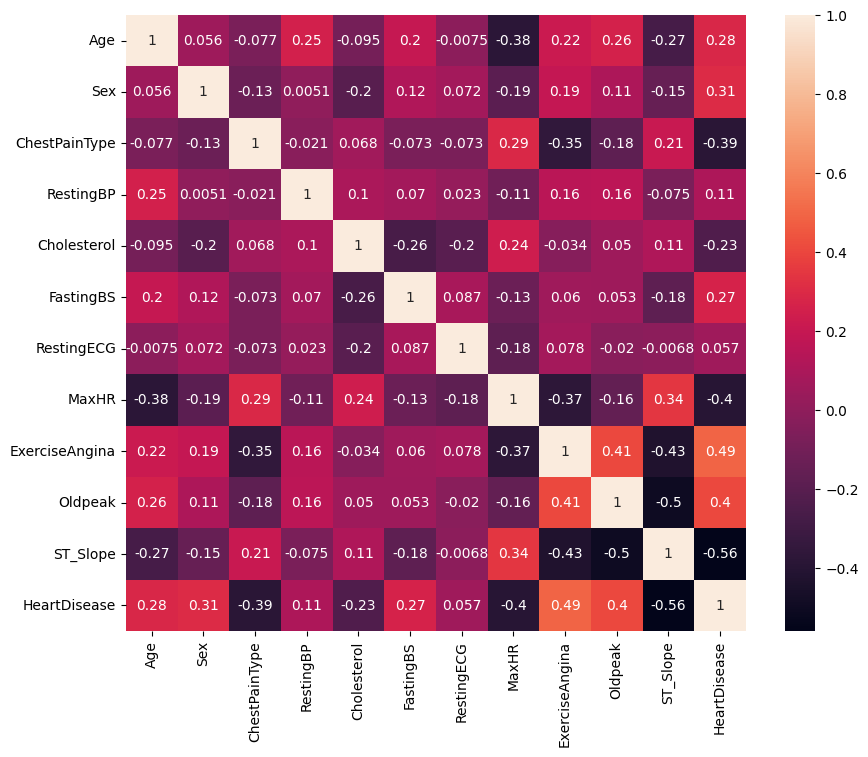

In [97]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [98]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


##FEATURE

In [99]:
x = df.drop(columns="HeartDisease", axis=1)
y = df["HeartDisease"]

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

##MODEL

In [101]:
model = LogisticRegression(max_iter=5000)

In [102]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [103]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [104]:
print("Akurasi data training : ", training_data_accuracy)

Akurasi data training :  0.8596730245231607


In [105]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


##Membuat data prediksi

In [106]:
input_data =  np.array([48,	0,	0,	138,	214,	0,	1,	108,	1,	1.5,	1])

input_data_reshaped = input_data.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0] == 0) :
    print("Pasien tidak terindikasi Penyakit jantung")
else :
    print("Pasien terindikasi Penyakit jantung")

[1]
Pasien terindikasi Penyakit jantung


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [107]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

##Simpan Model

In [108]:
import pickle
filename = 'heart.sav'
pickle.dump(model, open(filename, 'wb'))